In [27]:
from Capraise_Data_Preprocessing import OUT_DIR, IN_DIR
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

df_trans = pd.read_csv(OUT_DIR + 'preprocessed_data.csv', index_col=0)
df_trans.iloc[:, 6:12] = (df_trans.iloc[:, 6:12] - 70) / 6
X = df_trans.iloc[:, 0:18]
y = df_trans.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,gap_capital injection,gap_crowdfunding,gap_preferred stock,gap_recapitalization,gap_venture capital,gap_virtual data room,score_capital injection,score_crowdfunding,score_preferred stock,score_recapitalization,score_venture capital,score_virtual data room,rating_capital injection,rating_crowdfunding,rating_preferred stock,rating_recapitalization,rating_venture capital,rating_virtual data room
100thieves.com,6.000000,6.000000,0.566667,6.000000,6.000000,6.000000,0.000000,0.000000,4.511111,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000
12stonehealth.com,0.900000,0.900000,6.000000,6.000000,0.900000,0.900000,2.416667,0.666667,0.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000
3ctechs.com,6.000000,1.602242,6.000000,1.865019,6.000000,6.000000,0.000000,0.333333,0.000000,0.822222,0.000000,0.000000,1.000000,1.000000,1.000000,1.066667,1.000000,1.000000
3gtms.com,0.666667,0.666667,6.000000,6.000000,0.666667,0.666667,2.166667,4.166667,0.000000,0.000000,3.666667,4.333333,3.000000,5.000000,1.000000,1.000000,5.000000,5.000000
5apes.com,6.000000,6.000000,3.579657,6.000000,6.000000,6.000000,0.000000,0.000000,1.916667,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeltech.com,3.063360,6.000000,6.000000,6.000000,1.201840,2.472614,0.555556,0.000000,0.000000,0.000000,2.375000,0.500000,1.333333,1.000000,1.000000,1.000000,3.750000,1.000000
zennify.com,2.600000,2.600000,2.093333,0.566667,3.111111,3.111111,2.791667,2.250000,2.044445,0.805556,2.555556,0.222223,3.333333,3.000000,3.083333,1.166667,4.000000,1.000000
zingtree.com,6.000000,2.700000,6.000000,6.000000,2.700000,1.688889,0.000000,0.166667,0.000000,0.000000,0.333333,1.483334,1.000000,1.000000,1.000000,1.000000,1.000000,2.077778
ztech.io,1.212616,6.000000,1.792860,2.707331,1.621027,1.494009,2.222221,0.000000,1.416667,1.500000,0.666667,2.722223,2.833333,1.000000,2.000000,2.000000,1.500000,3.333333


In [28]:
# LightGBM (Baseline)
from lightgbm import LGBMClassifier
clf0 = LGBMClassifier(max_depth=3, learning_rate=0.05, n_estimators=50, reg_alpha=5.0, is_unbalance=True)##, objective='fair')
scores_0 = cross_val_score(clf0, X, y, scoring ="f1", cv = 5)
print(scores_0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[0.64       0.66666667 0.59036145 0.65       0.65838509]


In [29]:
# RELU-DNN
from piml.models import ReluDNNClassifier
clf1 = ReluDNNClassifier(hidden_layer_sizes=(20, 20), l1_reg=0.0001, batch_size=100, learning_rate=0.001)
scores_1 = cross_val_score(clf1, X, y, scoring = "f1",cv = 5)
print(scores_1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[0.464      0.65359477 0.59701493 0.54263566 0.47244094]


In [30]:
# GAMI-Net
from piml.models import GAMINetClassifier
clf2 = GAMINetClassifier(interact_num=10, loss_threshold=0.001,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20])
scores_2 = cross_val_score(clf2, X, y, scoring = "f1",cv = 5)
print(scores_2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[0.55714286 0.52238806 0.63157895 0.65432099 0.62337662]


In [31]:
# EBM
from piml.models import ExplainableBoostingClassifier
clf3 = ExplainableBoostingClassifier(interactions=15, random_state=0)
scores_3 = cross_val_score(clf3, X, y, scoring = "f1",cv = 5)
print(scores_3)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[0.68085106 0.73469388 0.7027027  0.69863014 0.68421053]


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[0.64 0.55 0.6  0.7  0.73 0.71]


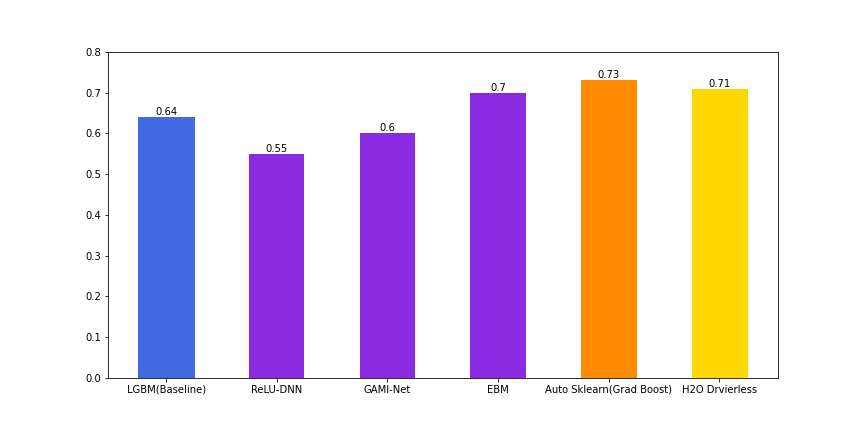

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# Result from Auto Sklearn
scores_4 = [0.6962963, 0.71165644, 0.71724138, 0.81761006, 0.69677419]
# Result from H2O.ai
scores_5 = [0.7120] * 5
name_comparison = ['LGBM(Baseline)', 'ReLU-DNN', 'GAMI-Net', 'EBM', 'Auto Sklearn(Grad Boost)', 'H2O Drvierless']
score_matrix = np.array([scores_0, scores_1, scores_2, scores_3, scores_4, scores_5])
score_comparison = np.mean(score_matrix, axis=1)
score_comparison = np.round(score_comparison, 2)
print(score_comparison)
plt.figure(figsize=(12, 6))
bars = plt.bar(name_comparison, score_comparison, width=0.5, color='blueviolet')
bars[0].set_color('royalblue')
bars[4].set_color('darkorange')
bars[5].set_color('gold')
plt.bar_label(bars)
plt.ylim([0, 0.8])
plt.savefig(OUT_DIR + 'score_comparison.pdf')
plt.show()


In [33]:
df_result = pd.DataFrame(score_matrix.T, index=['fold_'+str(i) for i in range(5)], columns=name_comparison)
df_result.to_csv(OUT_DIR + 'cv_scores.csv')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,gap_capital injection,gap_crowdfunding,gap_preferred stock,gap_recapitalization,gap_venture capital,gap_virtual data room,score_capital injection,score_crowdfunding,score_preferred stock,score_recapitalization,score_venture capital,score_virtual data room,rating_capital injection,rating_crowdfunding,rating_preferred stock,rating_recapitalization,rating_venture capital,rating_virtual data room,label
0,6.000000,6.000000,0.566667,6.000000,6.000000,6.000000,0.000000,0.000000,4.511111,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.0
1,0.900000,0.900000,6.000000,6.000000,0.900000,0.900000,2.416667,0.666667,0.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.0
2,6.000000,1.602242,6.000000,1.865019,6.000000,6.000000,0.000000,0.333333,0.000000,0.822222,0.000000,0.000000,1.000000,1.000000,1.000000,1.066667,1.000000,1.000000,0.0
3,0.666667,0.666667,6.000000,6.000000,0.666667,0.666667,2.166667,4.166667,0.000000,0.000000,3.666667,4.333333,3.000000,5.000000,1.000000,1.000000,5.000000,5.000000,1.0
4,6.000000,6.000000,3.579657,6.000000,6.000000,6.000000,0.000000,0.000000,1.916667,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,3.063360,6.000000,6.000000,6.000000,1.201840,2.472614,0.555556,0.000000,0.000000,0.000000,2.375000,0.500000,1.333333,1.000000,1.000000,1.000000,3.750000,1.000000,0.0
1010,2.600000,2.600000,2.093333,0.566667,3.111111,3.111111,2.791667,2.250000,2.044445,0.805556,2.555556,0.222223,3.333333,3.000000,3.083333,1.166667,4.000000,1.000000,1.0
1011,6.000000,2.700000,6.000000,6.000000,2.700000,1.688889,0.000000,0.166667,0.000000,0.000000,0.333333,1.483334,1.000000,1.000000,1.000000,1.000000,1.000000,2.077778,1.0
1012,1.212616,6.000000,1.792860,2.707331,1.621027,1.494009,2.222221,0.000000,1.416667,1.500000,0.666667,2.722223,2.833333,1.000000,2.000000,2.000000,1.500000,3.333333,0.0


,0,1
0,Inactive columns name,[]
1,Target colunm name,label
2,Task type,Classification
3,Test ratio,0.2
4,Random state,42


HTML(value="<p class='notification info'>Register LightGBM Done</p>")

HTML(value="<p class='notification info'>Register EBM Done</p>")

,,ACC,AUC,Recall,Precision,F1
0,Train,0.943280,0.992604,0.866667,0.993056,0.925566
1,Test,0.807882,0.816363,0.621622,0.807018,0.702290
2,Gap,-0.135398,-0.176241,-0.245045,-0.186038,-0.223276


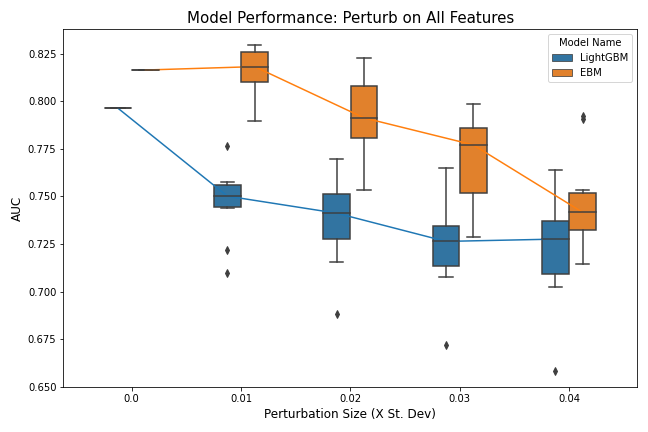

In [34]:
from piml import Experiment

exp = Experiment()
exp.data_loader(data=df_trans)
exp.data_prepare(target='label', task_type='Classification', test_ratio=0.2, random_state=42)

# LightGBM
from lightgbm import LGBMClassifier
clf = LGBMClassifier(max_depth=5, learning_rate=0.05, n_estimators=100, reg_alpha=5.0, is_unbalance=True)
pipeline = exp.make_pipeline(model=clf, name='LightGBM')
pipeline.fit()
exp.register(pipeline=pipeline)

## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingClassifier
clf3 = ExplainableBoostingClassifier(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_result')

exp.model_compare(models=['LightGBM', 'EBM'], show='robustness_perf', perturb_features='All Features', step=0.01, figsize=(9,6))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

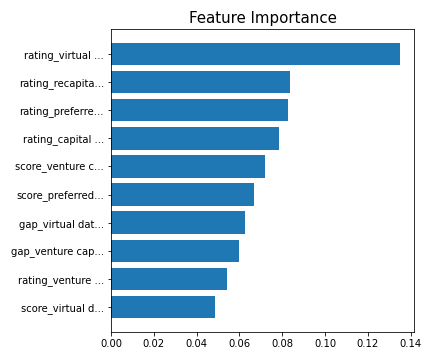

In [35]:
exp.model_interpret(model='EBM', show='global_fi', figsize=(6,5))